# <center> SVM implementation project on titanic dataset
### hello!
### wellcome to another Titanic dataset analysis and Prediction project using the SVM algorithm!

<img src="https://s4.uupload.ir/files/1161691_vh1b.jpg" border="0" alt="آپلود عکس" />

#  Introduction Support Vector Machine
**Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.**

**The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.**

**SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.**


#  Support Vector Machines intuition 



## familiar with some SVM terminology. 


###  Hyperplane

**A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.**


###  Support Vectors

**Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.**


###  Margin

**A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.**

The following diagram illustrates these concepts visually.


###  Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


###  SVM Under the hood

**In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –**


**1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.**

**2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** **and the linear classifier it defines is known as a maximum margin classifier**. 


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


###  Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



###  Problem with dispersed datasets


**Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.**


###  Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)


### Kernel trick

**In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.**

### Define the kernel function


**Kernel function**

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

**In the context of SVMs, there are 4 popular kernels – Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel. These are described below -**

##  Linear kernel

**In linear kernel, the kernel function takes the form of a linear function as follows-**

**linear kernel : K(xi , xj ) = xiT xj**

**Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.**

**Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.**

**Linear kernel can be visualized with the following figure.**

### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

##  Polynomial Kernel

**Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.**

**For degree-d polynomials, the polynomial kernel is defined as follows –**

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

**Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.**

##  Radial Basis Function Kernel

**Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –**


### Radial Basis Function kernel

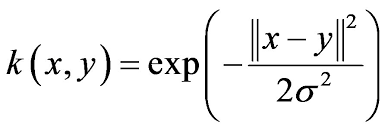

##  Sigmoid kernel

**Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –**

**sigmoid kernel : k (x, y) = tanh(αxTy + c)**

**Sigmoid kernel can be visualized with the following diagram-**

### Sigmoid kernel

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

### To get started, we first import the necessary libraries :

# Import all Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [ ]:
df=pd.read_csv('../input/titanic/train.csv')

# Data Overview

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

# Exploratory data analysis (EDA)

### Now, I will explore the data to gain insights about the data.

In [ ]:
df['Survived'].value_counts()

In [ ]:
sns.countplot(data=df, x='Survived')

In [ ]:
df.corr()['Survived'].sort_values()

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="prism")

In [ ]:
sns.pairplot(data=df)

# Data Preparation
 ### 1. Check the missing values in the dataset

In [ ]:
((df.isnull().sum())/len(df))*100

In [ ]:
df.drop('Cabin',axis=1,inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace = True)

((df.isnull().sum())/len(df))*100

In [ ]:
df.info()

In [ ]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent
nan_percent=missing_percent(df)
nan_percent

In [ ]:
df.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)
df.loc[df['Sex']=='male','Sex']=1
df.loc[df['Sex']=='female','Sex']=0

In [ ]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent
nan_percent=missing_percent(df)
nan_percent

### We can see that there are no missing values in the dataset.

### 2. Determine feature vector and label variable
**Features & Label**

In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']

### Spliting data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### 3. Scalling The Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

In [ ]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

## Handle outliers with SVMs
**There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.**

**The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.**

**Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.**

**The message is that since the dataset contains outliers, so the value of C should be high while training the model.**

We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# running of svm  model on train data

**Scikit-Learn provides useful libraries to implement Support Vector Machine algorithm on a dataset. There are many libraries that can help us to implement SVM smoothly. We just need to call the library with parameters that suit to our needs. In this project, I am dealing with a classification task. So, I will mention the Scikit-Learn libraries for SVM classification purposes.**

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train , y_train)

# Predicting Test Data

In [ ]:
y_pred=model.predict(X_test)

# Evaluating Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

# Hyperparameters Tuning
### Choosing the best hyperparameters through GridSearchCV

In [ ]:
help(SVC)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm,param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
y_pred_grid= grid.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_grid)

In [ ]:
print(classification_report(y_test, y_pred_grid))

# Finish

**I hope you find this kernel useful and enjoyable.**

**Your comments and feedback are most welcome.**

**Thank you**